In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,England,40,3,2,3,4003.0,1851,2152.0,15476,117,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,England,25,4,2,3,4277.0,2186,2091.0,8764,69,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,England,36,5,3,4,5409.0,0,5409.0,10291,60,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,England,36,4,3,3,5281.0,0,5281.0,8395,62,0.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

In [3]:
df.shape

(10127, 20)

In [4]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [5]:
df["Card_Category"].fillna(value=df["Card_Category"].mode()[0],inplace=True)
df["Credit_Limit"].fillna(value=df["Credit_Limit"].mean(),inplace=True)

In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical               continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Customer_Age              Credit_Limit
Gender                    Total_Revolving_Bal
Dependent_count           Avg_Open_To_Buy
Education_Level           Total_Trans_Amt
Marital_Status            Total_Trans_Ct
Income_Category           Avg_Utilization_Ratio
Card_Category
Region
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


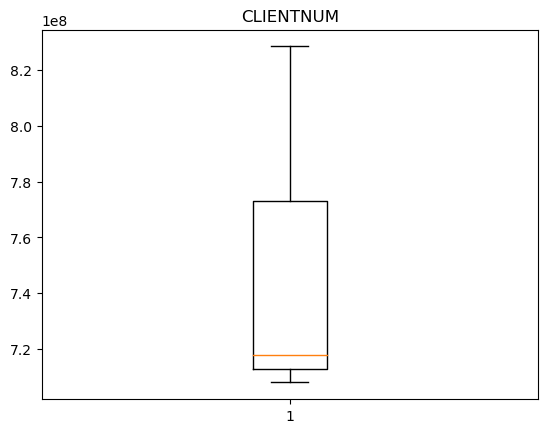

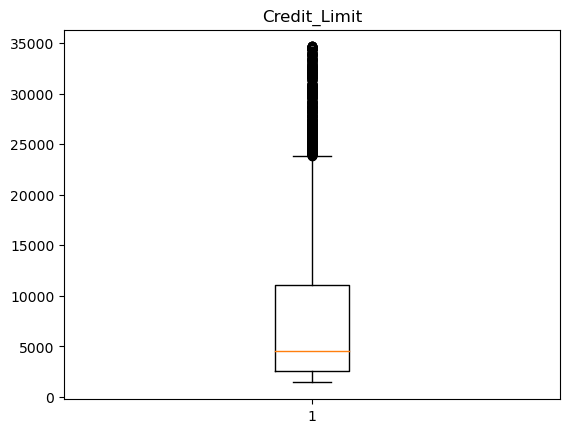

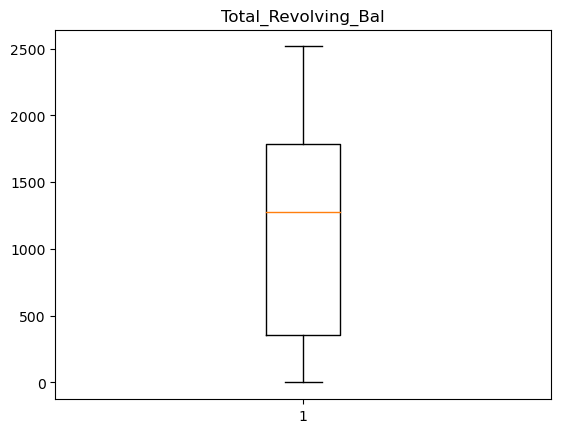

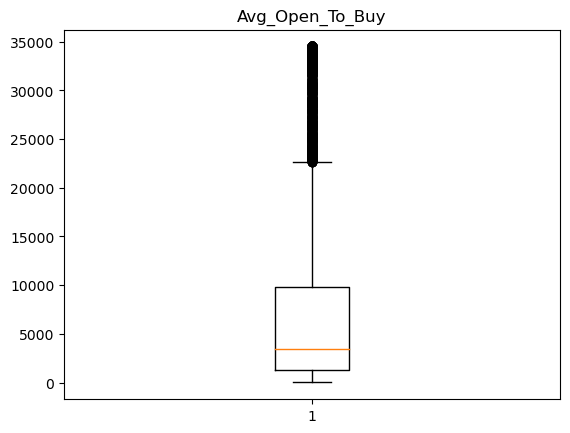

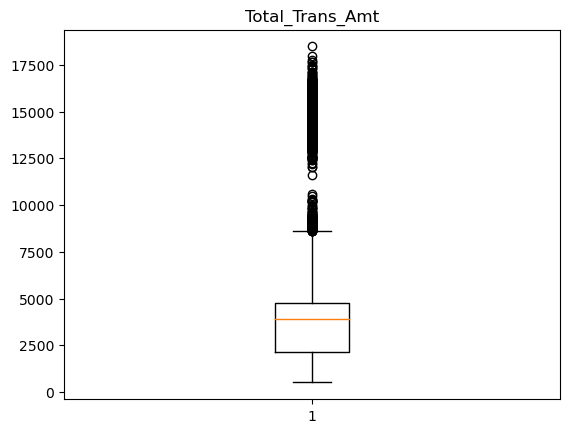

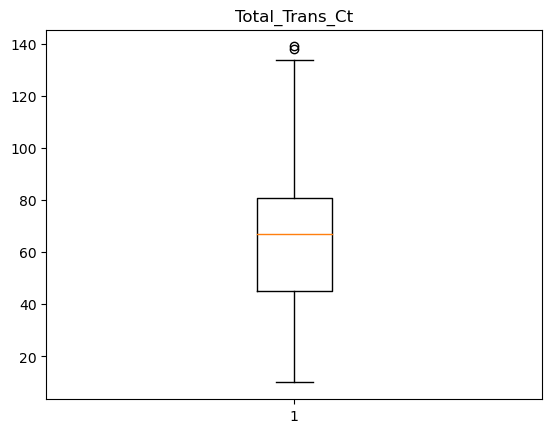

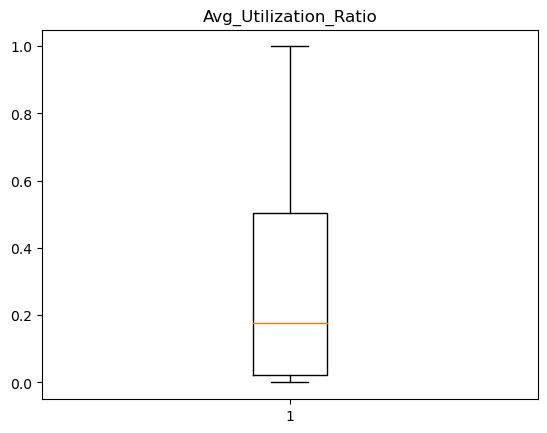

In [9]:
def box(col):
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
for i in continuous:
    box(i)

In [10]:
df.to_csv("Tableau_Project.csv")